In [1]:
# Importing

In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [562]:
pd.set_option('display.max_rows', None)

In [563]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Loading Time-Series

In [502]:
time = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\timeserie_energia_economia_extended.csv')

# Cleaning

In [503]:
time.dropna(how='all', inplace=True, axis=1)

In [504]:
for col in time.columns[2:]: time[col] = time[col].fillna(time[col].mean())

In [505]:
keep = []

for i in time.Bairros:
    
    if len(i.split())>2:    
        
        if i.split()[2]=='planejamento': keep.append(False)
        else: keep.append(True)
            
    else: 
        if i=='total': keep.append(False)
        else: keep.append(True)

In [506]:
time = time[keep]

# Feature Selection

#### Note: Remember to Fill missing values with means of same neighborhood

In [507]:
targets = ['Consumo de energia elétrica (MWh)', 'Residencial_x',        # Energy related variables
       'Industrial_x', 'Comercial', 'Rural_x', 'Poder público ',
       'Iluminacão pública', 'Serv.público_x', 'Consumo próprio_x',
       'Consumo resdencial de energia elétrica (MWh)',
       'Médio anual por unidade consumidora  ',
       'Total de unidades consumidoras  residenciais ', 'Total_y.1',
       'Residencial_y', 'Industrial_y', 'Comercial ', 'Rural_y',
       'Poderes públicos ', 'Iluminação pública', 'Serv.público_y',
       'Consumo próprio_y']

In [517]:
i=-1

In [519]:
i+=1
target = targets[i]

In [513]:
print(i, target)

3 Comercial


### X and Y Definition:

In [522]:
x = time.drop(targets, axis=1).iloc[:, 2:]

In [523]:
y = time[[target]]

# Feature Encoding

#### Choosing Intervals for Categories

In [376]:
bins = [y[target].min()-1, 26000, 67000, 102000, 176000, 250000, y[target].max()+1]
labels=['A', 'B', 'C', 'D', 'E', 'F']

In [498]:
y_cat = pd.cut(y[target], bins, right=True, labels=labels)

In [ ]:
y.plot.hist(bins=150, figsize=(22, 10))            # Used to determine the boundary between between  newlabels

plt.xticks(np.linspace(-1e4, 3e5,31), fontsize=11)
plt.grid()

[[<matplotlib.lines.Line2D at 0x26b021e8b20>],

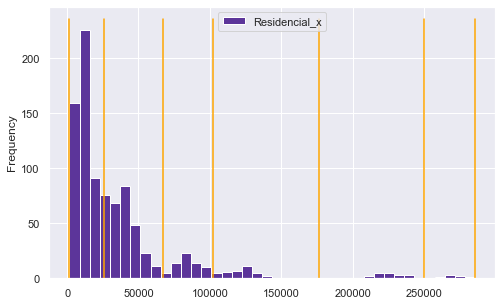

In [524]:
fig = plt.figure()                               # Used to visualize new labels intervals.
ax0 = fig.add_subplot(111)

y.plot(kind='hist', bins=40, figsize=(8,5), ax=ax0)
u = np.linspace(0,235,100)
[ax0.plot(u*0+bins[i], u, color='orange') for i in range(len(bins))]
plt.show()

#### Optional: Encoding with Ordinal Encoder

### Note: Test wether ordinal encoded y is working here

In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [499]:
y_cod = OrdinalEncoder().fit_transform(y_cat.to_frame())

In [500]:
y_cat = pd.Series(y_cod.ravel())


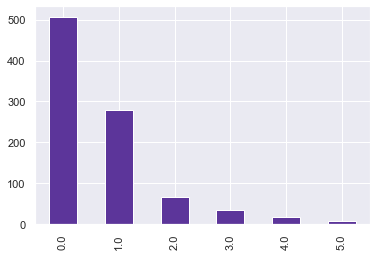

In [384]:
y_cat.value_counts().plot(kind='bar')

# Log Transformation

In [382]:
#y = y.apply(np.log1p)

In [383]:
x = x.apply(np.log1p)

# Normalization

In [385]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
#y_norm = scaler.fit_transform(y)

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
y_norm = scaler.fit_transform(y)

x_norm = StandardScaler().fit_transform(x)
y_norm = StandardScaler().fit_transform(y)

# Modeling: Decision Tree Classifier

### Optimizing Maximum Tree Depth Parameter

In [453]:
msk = np.random.rand(len(y))<0.8
x_train, y_train, x_test, y_test = x_norm[msk], y_cat[msk], x_norm[~msk], y_cat[~msk]

scrs = []
for i in range(1, 50):    
    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(x_train, y_train)
    
    y_pred = tree.predict(x_test)
    
    scrs.append([i, accuracy_score(y_test, y_pred)])
    
    if i in range(1, 50, 5): print(i)

scrs_df = pd.DataFrame(scrs, columns=['max depth', 'score'])

scrs_df.plot(x='max depth', y='score', figsize=(8,5))
plt.legend(loc='lower right', fontsize=14)
plt.xticks(np.arange(-1, 50, 2))
plt.grid()

#### Optimum Max Depth Param for entropy criterion: 6

## Modeling: Decision Tree classifier

In [475]:
msk = np.random.rand(len(y))<0.8
x_train, y_train, x_test, y_test = x_norm[msk], y_cat[msk], x_norm[~msk], y_cat[~msk]
 

tree = DecisionTreeClassifier(criterion='entropy', max_depth=9).fit(x_train, y_train)
    
y_pred = tree.predict(x_test)

round(accuracy_score(y_test, y_pred), 5)

0.9378238341968912

In [477]:
feature_importance = pd.DataFrame(tree.feature_importances_, index=x.columns)

feature_importance[0].sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,10), legend='Feature Importance')